In [24]:
import numpy as np

from lib.perceptron import Perceptron
from lib.perceptron_helper import *
from lib.plot_3d import *

In [25]:
num_values = 100

mean1 = [0,0,0]
mean2 = [5,5,5]
covar = [[1,0,0],[0,1,0],[0,0,1]]

x1 = np.random.multivariate_normal(mean1, covar, (num_values))
print("Shape of gaussian distribution 1: ", x1.shape)

x2 = np.random.multivariate_normal(mean2, covar, (num_values))
print("Shape of gaussian distribution 2: ", x2.shape)

final_x = np.concatenate([x1,x2])
print("Shape of training dataset: ",final_x.shape)

y1 = np.array([-1 for x in range(num_values)])
y2 = np.array([1 for x in range(num_values)])
final_y = np.concatenate([y1,y2])
print("Shape of label dataset: ",final_y.shape)


Shape of gaussian distribution 1:  (100, 3)
Shape of gaussian distribution 2:  (100, 3)
Shape of training dataset:  (200, 3)
Shape of label dataset:  (200,)


In [26]:
%%time

l_rate = 0.05
b_size = len(final_x)
init_weights = np.ones(4)

perceptron = Perceptron(dim=3, batch_size=5)

perceptron.fit(final_x,final_y)


Number of batches formed:  40



ValueError: shapes (5,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

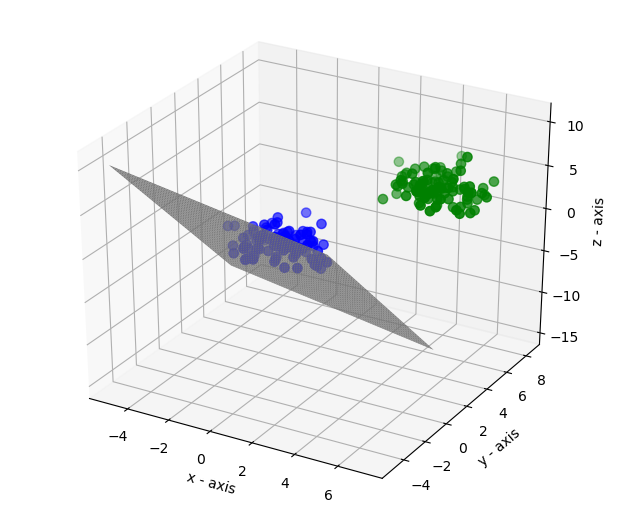

In [27]:
plot_hyperplane(final_x,final_y,perceptron.weights)

In [28]:

num_values = 50

mean1 = [0,0,0]
mean2 = [5,5,5]
covar = [[1,0,0],[0,1,0],[0,0,1]]

x1 = np.random.multivariate_normal(mean1, covar, (num_values))
x2 = np.random.multivariate_normal(mean2, covar, (num_values))

test = np.concatenate([x1,x2])

y1 = np.array([-1 for x in range(num_values)])
y2 = np.array([1 for x in range(num_values)])
test_labels = np.concatenate([y1,y2])


In [29]:
pred_labels = perceptron.predict(test)

accuracy(pred_labels,test_labels)

TypeError: compute() missing 1 required positional argument: 'weights'